In [8]:
import braidz_analysis as bz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import seaborn as sns
from tqdm import tqdm
import scipy
from scipy import signal
from scipy.signal import savgol_filter
from scipy.stats import gaussian_kde
import pynumdiff

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import seaborn as sns

base_folder = r"/Volumes/New Volume/Braidz Files"
cm2inch = 1 / 2.54

In [2]:
J88_First_Repeat = bz.braidz.read_braidz(["20250212_142029.braidz"], base_folder)
J88_Second_Repeat = bz.braidz.read_braidz(["20250213_142738.braidz"], base_folder)
J88_Third_Repeat = bz.braidz.read_braidz(["20250214_143405.braidz"], base_folder)

In [3]:
J88_First_Repeatoptodata = bz.processing.get_stim_or_opto_data(J88_First_Repeat["df"], J88_First_Repeat["opto"], type="opto")
J88_Second_Repeatoptodata = bz.processing.get_stim_or_opto_data(J88_Second_Repeat["df"], J88_Second_Repeat["opto"], type="opto")
J88_Third_Repeatoptodata = bz.processing.get_stim_or_opto_data(J88_Third_Repeat["df"], J88_Third_Repeat["opto"], type="opto")

100%|██████████| 101/101 [00:00<00:00, 384.88it/s]


In [4]:
J881_opto_data_filtered = bz.filtering.filter_data_dict(
    J88_First_Repeatoptodata,
    (J88_First_Repeatoptodata["frames_in_radius"] >= 15) & (J88_First_Repeatoptodata["sham"] == 0)
)

J882_opto_data_filtered = bz.filtering.filter_data_dict(
    J88_Second_Repeatoptodata,
    (J88_Second_Repeatoptodata["frames_in_radius"] >= 15) & (J88_Second_Repeatoptodata["sham"] == 0)
)

J883_opto_data_filtered = bz.filtering.filter_data_dict(
    J88_Third_Repeatoptodata,
    (J88_Third_Repeatoptodata["frames_in_radius"] >= 15) & (J88_Third_Repeatoptodata["sham"] == 0)
)

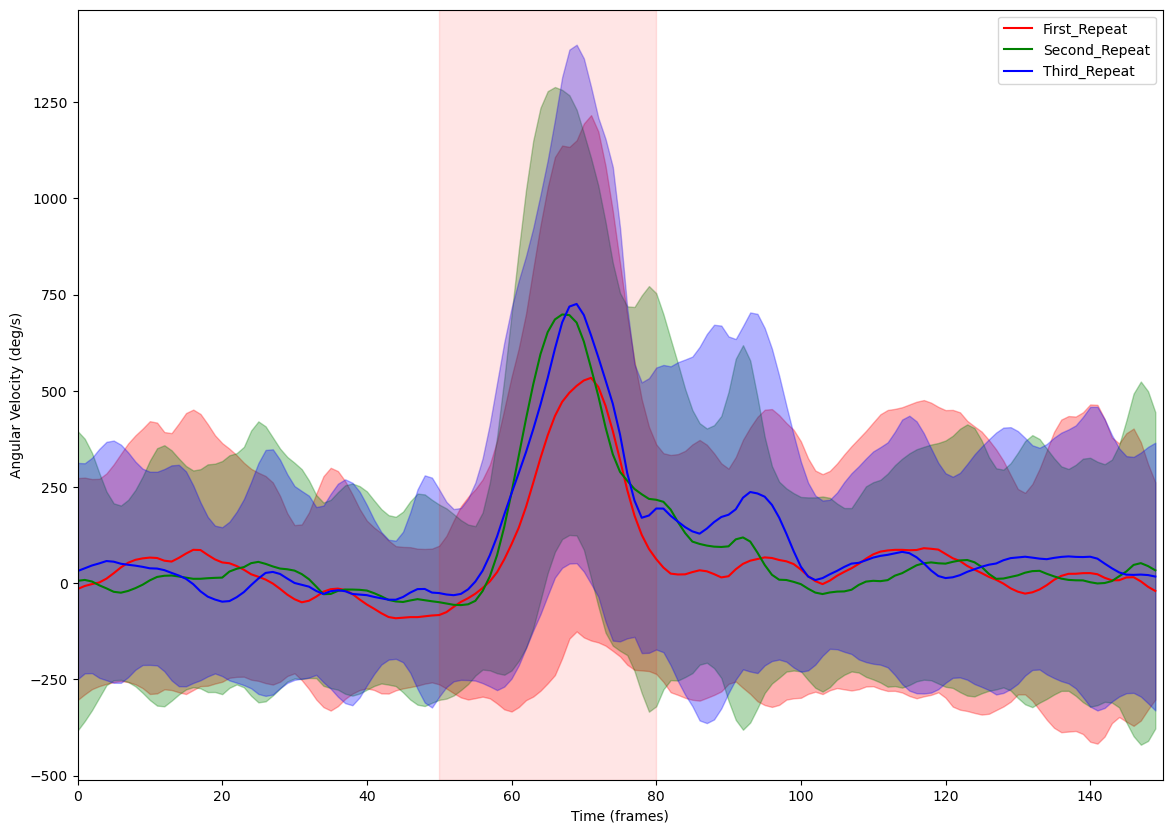

In [5]:
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all data on the same axis
bz.plotting.plot_angular_velocity(
    J881_opto_data_filtered,
    ax=ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color="red",
    convert_to_degrees=True,
    label="First_Repeat"
)

bz.plotting.plot_angular_velocity(
    J882_opto_data_filtered,
    ax=ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color="green",
    convert_to_degrees=True,
    label="Second_Repeat"
)

bz.plotting.plot_angular_velocity(
    J883_opto_data_filtered,
    ax=ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=None,
    color="blue",
    convert_to_degrees=True,
    label="Third_Repeat"
)


ax.axvspan(50, 80, color='red', alpha= 0.1)

# Add legend and show plot
ax.legend(loc="best")
plt.show()


In [9]:
J88_raw_data = bz.braidz.read_braidz(["20250212_142029.braidz", "20250213_142738.braidz", "20250214_143405.braidz"], base_folder)

In [10]:
J88_opto_data = bz.processing.get_stim_or_opto_data(J88_raw_data["df"], J88_raw_data["opto"], type="opto")

100%|██████████| 404/404 [00:02<00:00, 150.47it/s]


In [11]:
J88_opto_data_filtered = bz.filtering.filter_data_dict(
    J88_opto_data,
    (J88_opto_data["frames_in_radius"] >= 15) & (J88_opto_data["sham"] == 0)
)

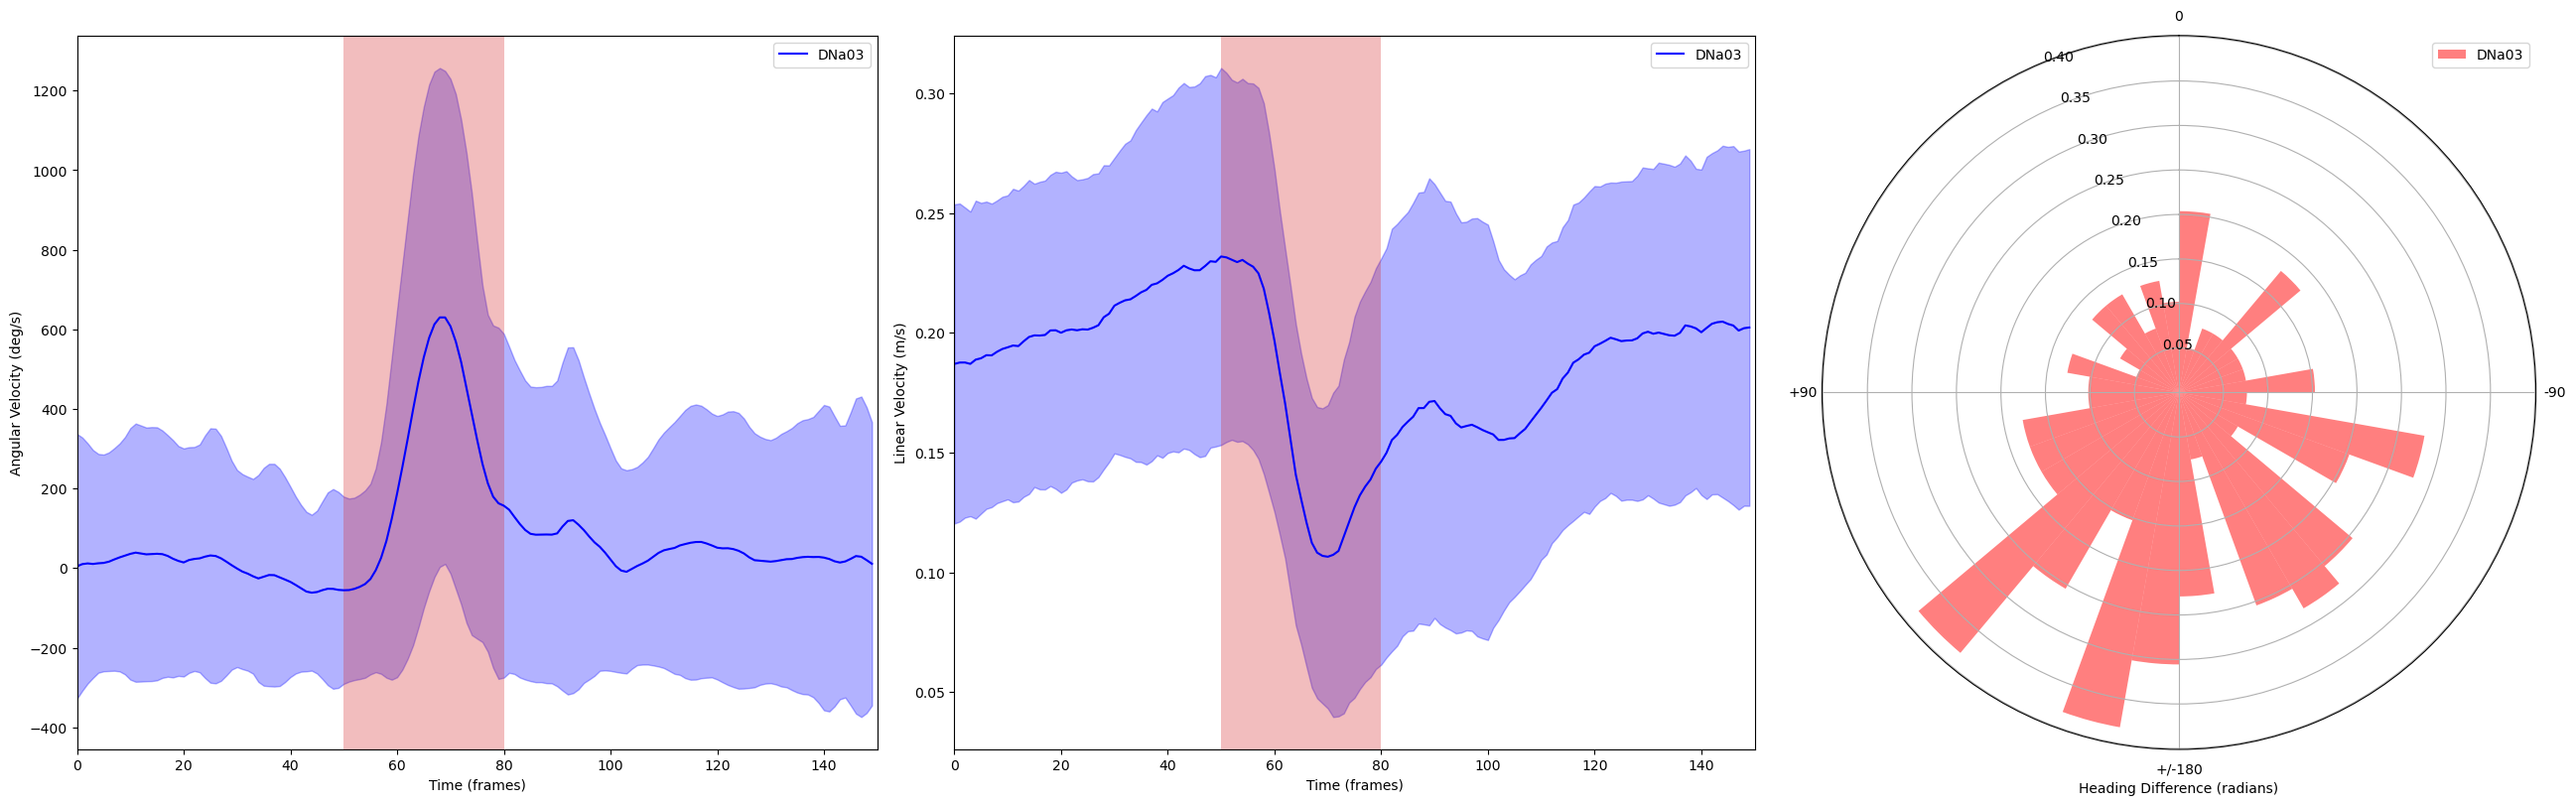

In [13]:
fig = plt.figure(figsize=(26, 8), constrained_layout=True)

# Angular velocity
ax1 = fig.add_subplot(1, 3, 1)
bz.plotting.plot_angular_velocity(
    J88_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "blue",
    label = "DNa03"

)

ax1.legend(loc="best")


# Linear velocity
ax2 = fig.add_subplot(1, 3, 2)
bz.plotting.plot_linear_velocity(
    J88_opto_data_filtered,
    ax = ax2,
    color = "blue",
    label = "DNa03"
)

ax2.legend(loc="best")


# Heading difference
ax3 = fig.add_subplot(1, 3, 3, projection='polar')
bz.plotting.plot_heading_difference(J88_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, color="red", label="DNa03", alpha=0.5)

ax3.legend(loc="best")

# Set 0 so it's pointing "North"
ax3.set_theta_zero_location("N")
ax3.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax3.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax3.set_ylabel("")
plt.show()

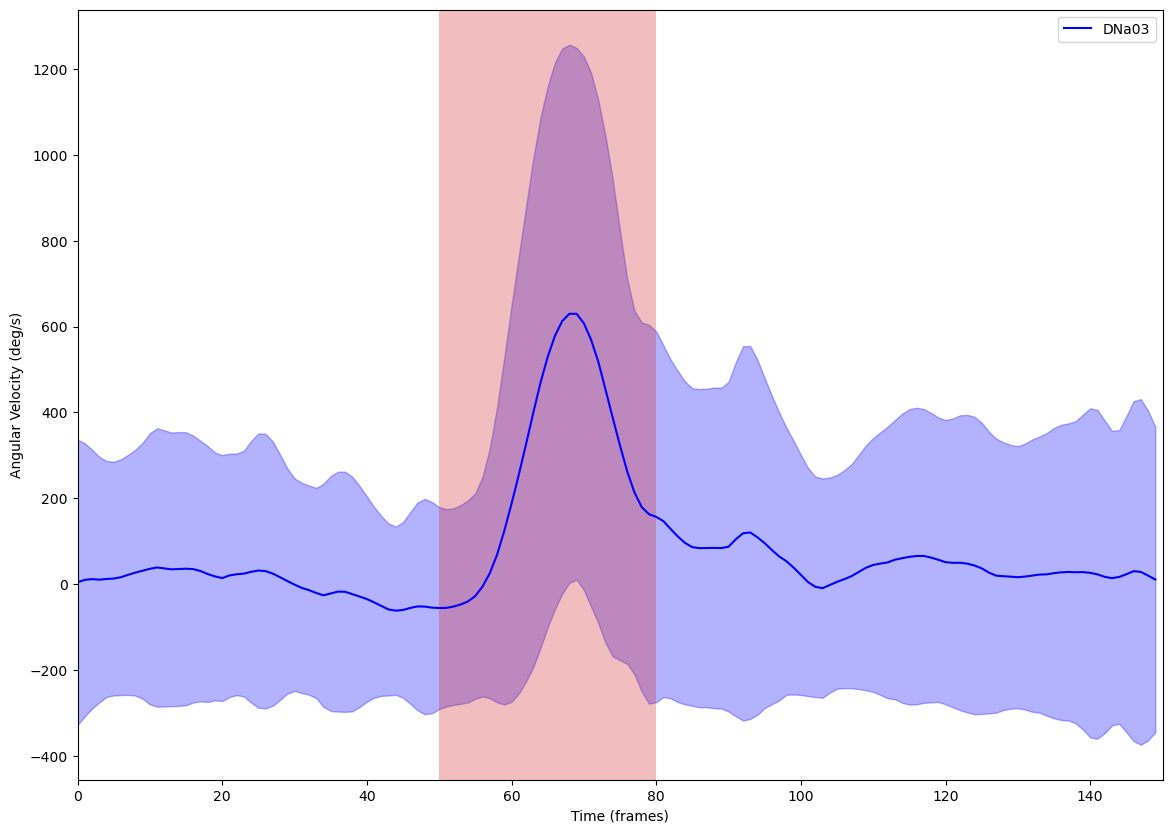

In [6]:
fig = plt.figure(figsize=(14, 10), constrained_layout=False)

# Angular velocity
ax = fig.add_subplot()
bz.plotting.plot_angular_velocity(
    J88_opto_data_filtered,
    ax = ax,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
    color = "blue",
    label = "DNa03"

)



ax.legend(loc="best")
plt.show()

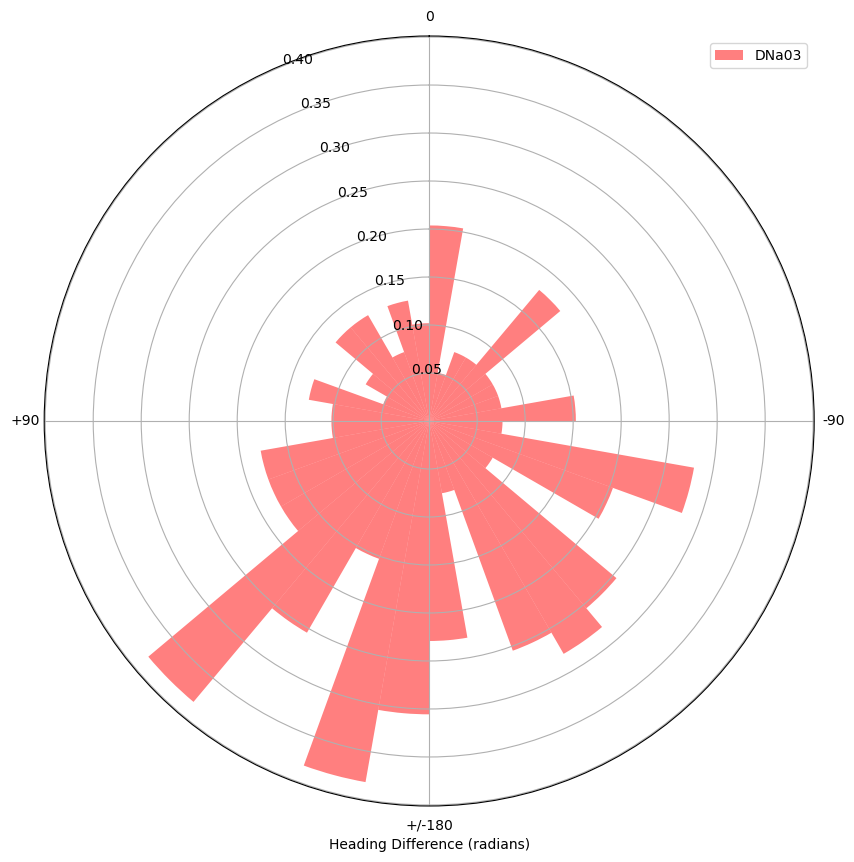

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define figure size (width, height in inches)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(14, 10))  # Adjust size as needed

bz.plotting.plot_heading_difference(J88_opto_data_filtered, ax=ax, convert_to_degrees=False, density=True, color="red", label="DNa03", alpha=0.5)

ax.legend(loc="best")

# Set 0 so it's pointing "North"
ax.set_theta_zero_location("N")
ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax.set_ylabel("")

plt.show()


In [8]:
def process_all_trajectories(stim, df):
    """
    Process all trajectories and collect data including heading changes.
    """
    angvels = []
    linvels = []
    groups = []
    heading_changes = []
    turning_directions = []
    distance_from_center = []

    for _, row in tqdm(stim.iterrows(), total=len(stim)):
        obj_id = row["obj_id"]
        exp_num = row["exp_num"]
        frame = row["frame"]

        # Get trajectory data
        grp = df[(df["obj_id"] == obj_id) & (df["exp_num"] == exp_num)].copy()

        if len(grp) < 200:
            continue

        stim_idx = np.where(grp["frame"] == frame)[0]
        stim_idx = stim_idx[0] if len(stim_idx) > 0 else None

        grp = sg_smooth(grp)

        # Calculate all velocities and angles
        x, y, z = grp["x"].to_numpy(), grp["y"].to_numpy(), grp["z"].to_numpy()
        xvel, yvel = grp["xvel"].to_numpy(), grp["yvel"].to_numpy()

        theta = np.arctan2(yvel, xvel)
        theta_unwrap = np.unwrap(theta)
        _, angular_velocity = pynumdiff.smooth_finite_difference.butterdiff(
            theta_unwrap, dt=0.01, params=[1, 0.1]
        )
        linear_velocity = np.sqrt(xvel**2 + yvel**2)

        saccades, directions = detect_saccades_both(angular_velocity)

        # Process spontaneous saccades
        for sac_idx in saccades:
            result = process_saccade(
                sac_idx,
                angular_velocity,
                linear_velocity,
                x,
                y,
                z,
                stim_idx,
                theta_unwrap,
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(np.sqrt(x[sac_idx] ** 2 + y[sac_idx] ** 2))

        # Process stimulus window
        if stim_idx is not None:
            result = process_stimulus_window(
                stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(
                    np.sqrt(x[stim_idx] ** 2 + y[stim_idx] ** 2)
                )

    out_dict = {
        "groups": groups,
        "angular_velocities": angvels,
        "linear_velocities": linvels,
        "heading_changes": heading_changes,
        "turning_directions": turning_directions,
        "distance_from_center": distance_from_center,
    }
    return out_dict

In [9]:
def sg_smooth(df, columns = ["x", "y", "z", "xvel", "yvel"], **kwargs):
    """
    Apply Savitzky-Golay filter to smooth specified columns in a DataFrame.
    """
    for col in columns:
        df[col] = savgol_filter(df[col], window_length=kwargs.get("window_length", 21), polyorder=kwargs.get("polyorder", 3))
    return df

def detect_response_peak(angular_velocity, start_idx, search_window=50, height=np.deg2rad(300), distance=50):
    """
    Detects the response peak in the angular velocity signal within a specified search window.
    """
    from scipy.signal import find_peaks

    # Define search region
    end_idx = min(start_idx + search_window, len(angular_velocity))
    search_region = angular_velocity[start_idx:end_idx]

    # Look for peaks in both directions
    peaks_pos, _ = find_peaks(search_region, height=height, distance=distance)
    peaks_neg, _ = find_peaks(-search_region, height=height, distance=distance)

    all_peaks = np.concatenate([peaks_pos, peaks_neg])
    response_direction = ["pos"] * len(peaks_pos) + ["neg"] * len(peaks_neg)

    sort_idx = np.argsort(all_peaks)
    all_peaks = all_peaks[sort_idx]
    response_direction = np.array(response_direction)[sort_idx]

    if len(all_peaks) > 0:
        # Return the first peak found (relative to stimulus onset)
        return start_idx + all_peaks[0], response_direction[0]
    return None, None


def compute_heading_change(
    theta_unwrap,
    center_idx,
    k_frames=10,
    method="mean",
    buffer_frames=None,
    x=None,
    y=None,
):
    """
    Compute the change in heading around a specified index using different methods.
    """
    if method == "mean":
        # Ensure bounds including buffer if specified
        buffer = buffer_frames if buffer_frames is not None else 0
        total_frames_needed = k_frames + buffer

        if (
            center_idx - total_frames_needed < 0
            or center_idx + total_frames_needed >= len(theta_unwrap)
        ):
            return None

        # Compute mean heading before and after, respecting buffer
        pre_heading = np.mean(
            theta_unwrap[center_idx - total_frames_needed : center_idx - buffer]
        )
        post_heading = np.mean(
            theta_unwrap[center_idx + buffer : center_idx + total_frames_needed]
        )

        # Compute change and wrap to [-π, π]
        heading_change = np.arctan2(
            np.sin(post_heading - pre_heading), np.cos(post_heading - pre_heading)
        )

    elif method == "vector":
        if x is None or y is None:
            raise ValueError("x and y coordinates are required for vector method")

        # Ensure bounds
        if center_idx - k_frames < 0 or center_idx + k_frames >= len(x):
            return None

        # Get points at distance k from peak
        pre_x = x[center_idx - k_frames]
        pre_y = y[center_idx - k_frames]
        post_x = x[center_idx + k_frames]
        post_y = y[center_idx + k_frames]

        # Calculate vectors
        pre_vector = np.array([x[center_idx] - pre_x, y[center_idx] - pre_y])
        post_vector = np.array([post_x - x[center_idx], post_y - y[center_idx]])

        # Normalize vectors
        pre_vector = pre_vector / np.linalg.norm(pre_vector)
        post_vector = post_vector / np.linalg.norm(post_vector)

        # Calculate angle between vectors
        dot_product = np.clip(np.dot(pre_vector, post_vector), -1.0, 1.0)
        heading_change = np.arccos(dot_product)

        # Determine sign of angle (positive for CCW, negative for CW)
        cross_product = np.cross(pre_vector, post_vector)
        heading_change *= np.sign(cross_product)

    else:
        raise ValueError("Method must be either 'mean' or 'vector'")

    return heading_change


def process_saccade(
    sac_idx, angular_velocity, linear_velocity, x, y, z, stim_idx, theta_unwrap
):
    """
    Processes a saccade event and extracts relevant information if it meets certain criteria.
    """

    WINDOW_SIZE = 100
    ARENA_BOUNDS = {"z": (0.05, 0.25), "x": (-0.2, 0.2), "y": (-0.2, 0.2)}

    # Skip if window is out of bounds
    if sac_idx - WINDOW_SIZE < 0 or sac_idx + WINDOW_SIZE >= len(angular_velocity):
        return None

    # Skip if saccade is in stimulus window
    if stim_idx is not None and stim_idx <= sac_idx <= stim_idx + WINDOW_SIZE:
        return None

    # Skip if outside arena bounds
    if not (
        ARENA_BOUNDS["z"][0] <= z[sac_idx] <= ARENA_BOUNDS["z"][1]
        and ARENA_BOUNDS["x"][0] <= x[sac_idx] <= ARENA_BOUNDS["x"][1]
        and ARENA_BOUNDS["y"][0] <= y[sac_idx] <= ARENA_BOUNDS["y"][1]
    ):
        return None

    # Extract velocity windows
    ang_vel_window = angular_velocity[sac_idx - WINDOW_SIZE : sac_idx + WINDOW_SIZE]
    lin_vel_window = linear_velocity[sac_idx - WINDOW_SIZE : sac_idx + WINDOW_SIZE]
    turning_direction = "pos" if angular_velocity[sac_idx] > 0 else "neg"

    # Compute heading change
    heading_change = compute_heading_change(
        theta_unwrap, sac_idx, method="vector", k_frames=25, x=x, y=y
    )

    return (
        "spontaneous",
        ang_vel_window,
        lin_vel_window,
        heading_change,
        turning_direction,
    )


def process_stimulus_window(
    stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap, default_delay=30
):
    """
    Process the stimulus window, including heading change calculation.
    """
    WINDOW_SIZE = 100
    ARENA_BOUNDS = {"z": (0.05, 0.25), "x": (-0.2, 0.2), "y": (-0.2, 0.2)}

    # First check if initial window is out of bounds
    if stim_idx - WINDOW_SIZE < 0 or stim_idx + WINDOW_SIZE >= len(angular_velocity):
        return None

    # Check arena bounds at stimulus time
    if not (
        ARENA_BOUNDS["z"][0] <= z[stim_idx] <= ARENA_BOUNDS["z"][1]
        and ARENA_BOUNDS["x"][0] <= x[stim_idx] <= ARENA_BOUNDS["x"][1]
        and ARENA_BOUNDS["y"][0] <= y[stim_idx] <= ARENA_BOUNDS["y"][1]
    ):
        return None

    # Try to detect a response
    response_idx, response_direction = detect_response_peak(
        angular_velocity,
        stim_idx,
        search_window=50,
        height=np.deg2rad(300),
        distance=10,
    )

    if response_idx is not None:
        # Response detected - align to response
        center_idx = response_idx
        group = "stimulus_response"
    else:
        # No response detected - use default delay
        center_idx = stim_idx + default_delay
        group = "stimulus_no_response"
        response_direction = "none"

    # Check if the aligned window is within bounds
    if center_idx - WINDOW_SIZE < 0 or center_idx + WINDOW_SIZE >= len(
        angular_velocity
    ):
        return None

    # Extract velocity windows aligned to either response or default delay
    ang_vel_window = angular_velocity[
        center_idx - WINDOW_SIZE : center_idx + WINDOW_SIZE
    ]
    lin_vel_window = linear_velocity[
        center_idx - WINDOW_SIZE : center_idx + WINDOW_SIZE
    ]

    # Compute heading change
    heading_change = compute_heading_change(
        theta_unwrap, center_idx, method="vector", k_frames=25, x=x, y=y
    )
    return group, ang_vel_window, lin_vel_window, heading_change, response_direction


def detect_saccades_both(angular_velocity, height=np.deg2rad(300), distance=40):
    """
    Detect saccades in both positive and negative directions.
    """
    from scipy.signal import find_peaks

    peaks_pos, _ = find_peaks(angular_velocity, height=height, distance=distance)
    peaks_neg, _ = find_peaks(-angular_velocity, height=height, distance=distance)

    peaks_concat = np.concatenate([peaks_pos, peaks_neg])

    # get directions list
    directions = np.array(["pos"] * len(peaks_pos) + ["neg"] * len(peaks_neg))

    # get sorting indices
    sort_idx = np.argsort(peaks_concat)

    # return sorted peaks and directions
    return peaks_concat[sort_idx], np.array(directions)[sort_idx]


def process_all_trajectories(stim, df):
    """
    Process all trajectories and collect data including heading changes.
    """
    angvels = []
    linvels = []
    groups = []
    heading_changes = []
    turning_directions = []
    distance_from_center = []

    for _, row in tqdm(stim.iterrows(), total=len(stim)):
        obj_id = row["obj_id"]
        exp_num = row["exp_num"]
        frame = row["frame"]

        # Get trajectory data
        grp = df[(df["obj_id"] == obj_id) & (df["exp_num"] == exp_num)].copy()

        if len(grp) < 200:
            continue

        stim_idx = np.where(grp["frame"] == frame)[0]
        stim_idx = stim_idx[0] if len(stim_idx) > 0 else None

        grp = sg_smooth(grp)

        # Calculate all velocities and angles
        x, y, z = grp["x"].to_numpy(), grp["y"].to_numpy(), grp["z"].to_numpy()
        xvel, yvel = grp["xvel"].to_numpy(), grp["yvel"].to_numpy()

        theta = np.arctan2(yvel, xvel)
        theta_unwrap = np.unwrap(theta)
        _, angular_velocity = pynumdiff.smooth_finite_difference.butterdiff(
            theta_unwrap, dt=0.01, params=[1, 0.1]
        )
        linear_velocity = np.sqrt(xvel**2 + yvel**2)

        saccades, directions = detect_saccades_both(angular_velocity)

        # Process spontaneous saccades
        for sac_idx in saccades:
            result = process_saccade(
                sac_idx,
                angular_velocity,
                linear_velocity,
                x,
                y,
                z,
                stim_idx,
                theta_unwrap,
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(np.sqrt(x[sac_idx] ** 2 + y[sac_idx] ** 2))

        # Process stimulus window
        if stim_idx is not None:
            result = process_stimulus_window(
                stim_idx, angular_velocity, linear_velocity, x, y, z, theta_unwrap
            )
            if result is not None:
                (
                    group,
                    ang_vel_window,
                    lin_vel_window,
                    heading_change,
                    turning_direction,
                ) = result
                groups.append(group)
                angvels.append(ang_vel_window)
                linvels.append(lin_vel_window)
                heading_changes.append(heading_change)
                turning_directions.append(turning_direction)
                distance_from_center.append(
                    np.sqrt(x[stim_idx] ** 2 + y[stim_idx] ** 2)
                )

    out_dict = {
        "groups": groups,
        "angular_velocities": angvels,
        "linear_velocities": linvels,
        "heading_changes": heading_changes,
        "turning_directions": turning_directions,
        "distance_from_center": distance_from_center,
    }
    return out_dict

In [10]:
J88_Results= process_all_trajectories(J88_raw_data["opto"], J88_raw_data["df"])

  0%|          | 0/404 [00:00<?, ?it/s]/var/folders/qf/y7jqh9357vj8xz0frb7cn9q40000gn/T/ipykernel_1516/341144974.py:99: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  cross_product = np.cross(pre_vector, post_vector)
100%|██████████| 404/404 [00:02<00:00, 139.46it/s]


In [11]:
# Option 3: Science journal palette (Nature style)
cp = ["#4c72b0", "#dd8452", "#55a868", "#8172b3","#da8bc3","FFD770"]

In [12]:
J88_stimulus_mask = np.array(
    [x.startswith("stimulus") for x in J88_Results["groups"]]
)
J88_turning_directions = np.array(J88_Results["turning_directions"])[
    J88_stimulus_mask
]
J88_pos_turn_count = sum(J88_turning_directions == "pos")
J88_neg_turn_count = sum(J88_turning_directions == "neg")
J88_none_turn_count = sum(J88_turning_directions == "none")


/var/folders/qf/y7jqh9357vj8xz0frb7cn9q40000gn/T/ipykernel_1516/3725212867.py:33: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=df_cleaned, x="Group", y="Percentage", hue="Direction", palette=cp)


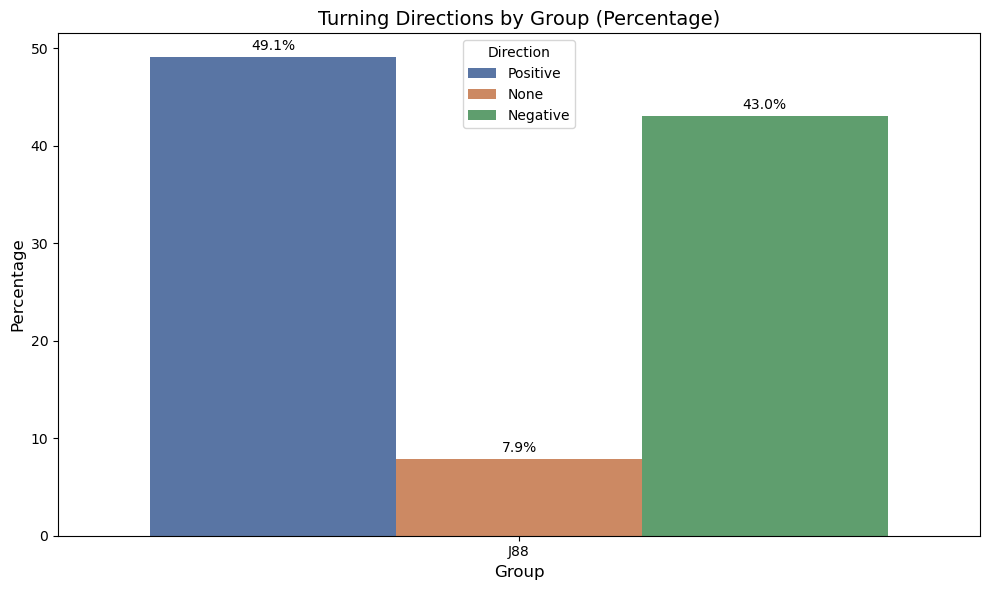

In [13]:
# Create initial DataFrame with counts
data = {
    "Group": ["J88"] * 3,
    "Direction": ["Positive", "None", "Negative"] * 1,
    "Count": [
        # DNa03 counts
        J88_pos_turn_count,
        J88_none_turn_count,
        J88_neg_turn_count,
        
    ],
}

# Padding to ensure consistency (if data structure requires uniform length)
max_length = max(len(data[key]) for key in data.keys())
for key in data.keys():
    if len(data[key]) < max_length:
        data[key].extend([None] * (max_length - len(data[key])))


df = pd.DataFrame(data)

df_cleaned = df.dropna(subset=["Group", "Count"])

# Calculate total counts for each group
group_totals = df_cleaned.groupby("Group")["Count"].transform("sum")

# Calculate percentages
df_cleaned["Percentage"] = (df_cleaned["Count"] / group_totals) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x="Group", y="Percentage", hue="Direction", palette=cp)

# Add titles and labels
plt.title("Turning Directions by Group (Percentage)", fontsize=14)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Group", fontsize=12)

# Add percentage labels on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.1f%%", padding=3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()